In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
dataset=pd.read_csv('/content/drive/MyDrive/Dataset/Dataset 2.csv',encoding='ISO-8859-1')

In [4]:
dataset

,text,polarity
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...
10309,No Depression by G Herbo is my mood from now o...,1
10310,What do you do when depression succumbs the br...,1
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,dont mistake a bad day with depression! everyo...,1


In [5]:
import torch   

#handling text data
from torchtext.legacy import data  

In [6]:
import re
def remove(text):
    return re.sub(r"[,.\"!@#$%^&*(){}?/;`~:<>+=-]", "", text)


In [7]:
dataset['text'] = dataset['text'].apply(lambda x: remove(x))


In [ ]:
dataset

In [8]:
dataset.drop(10313,inplace=True)

In [ ]:
dataset

In [ ]:
#dataset.rename(columns = {'message':'text'}, inplace = True)

In [ ]:
#dataset


In [9]:
dataset.drop( dataset[dataset.text.str.len() < 5].index, inplace= True) #why



In [ ]:
dataset

In [10]:
dataset.to_csv('data.csv',index= False)

In [11]:
#keras
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
numpy.random.seed(7)

In [12]:
dataset=pd.read_csv("data.csv")

In [ ]:
dataset

In [13]:
import tensorflow as tf

In [14]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [ ]:
#import nltk
#import re
#from nltk.corpus import stopwords

In [15]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [16]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
docs = []
for i in range(0, len(dataset)):
    
    review = re.sub('[^a-zA-Z]', ' ', dataset['text'][i]) #keep only words
    review = review.lower().split()
    #review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = " ".join(review)
    docs.append(review)
    #print(review)

In [17]:
#integer encode the documents
vocb_size=5000
encoded_docs=[one_hot(words,vocb_size)for words in docs] 
#onehot_repr

In [18]:
#pad documents to a max length of 20 words
max_length=20
embedded_docs=pad_sequences(encoded_docs,padding='post',maxlen=max_length)
print(embedded_docs)

[[3678 3852 3207 ...    0    0    0]
 [3373 4745 4102 ...    0    0    0]
 [2107 3161 1064 ...    0    0    0]
 ...
 [ 658 2645 1425 ...    0    0    0]
 [   7 2312 1938 ...    0    0    0]
 [1118  169 4334 ...    0    0    0]]


In [19]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(dataset.polarity)
X_final


array([[3678, 3852, 3207, ...,    0,    0,    0],
       [3373, 4745, 4102, ...,    0,    0,    0],
       [2107, 3161, 1064, ...,    0,    0,    0],
       ...,
       [ 658, 2645, 1425, ...,    0,    0,    0],
       [   7, 2312, 1938, ...,    0,    0,    0],
       [1118,  169, 4334, ...,    0,    0,    0]], dtype=int32)

In [20]:
y_final

array([0, 0, 0, ..., 1, 1, 1])

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

In [22]:
import matplotlib.pyplot as plt


In [23]:
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [24]:
# define model
model2 = Sequential()
model2.add(Embedding(vocb_size,40,input_length=max_length))
model2.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Conv1D(filters=32, kernel_size=4, activation='relu'))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Conv1D(filters=32, kernel_size=1, activation='relu'))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Flatten())
model2.add(Dense(10, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
print(model2.summary())
# compile network
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 40)            200000    
_________________________________________________________________
conv1d (Conv1D)              (None, 13, 32)            10272     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 6, 32)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 3, 32)             4128      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 1, 32)             1056      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 1, 32)             0

In [24]:
history=model2.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
108/108 [==============================] - 34s 13ms/step - loss: 0.4334 - accuracy: 0.8217 - val_loss: 0.1427 - val_accuracy: 0.9586
Epoch 2/10
108/108 [==============================] - 1s 9ms/step - loss: 0.0437 - accuracy: 0.9876 - val_loss: 0.0428 - val_accuracy: 0.9877
Epoch 3/10
108/108 [==============================] - 1s 9ms/step - loss: 0.0088 - accuracy: 0.9986 - val_loss: 0.0456 - val_accuracy: 0.9868
Epoch 4/10
108/108 [==============================] - 1s 9ms/step - loss: 0.0054 - accuracy: 0.9994 - val_loss: 0.0529 - val_accuracy: 0.9859
Epoch 5/10
108/108 [==============================] - 1s 8ms/step - loss: 0.0048 - accuracy: 0.9994 - val_loss: 0.0619 - val_accuracy: 0.9856
Epoch 6/10
108/108 [==============================] - 1s 8ms/step - loss: 0.0043 - accuracy: 0.9994 - val_loss: 0.0592 - val_accuracy: 0.9865
Epoch 7/10
108/108 [==============================] - 1s 8ms/step - loss: 0.0042 - accuracy: 0.9994 - val_loss: 0.0747 - val_accuracy: 0.9847
Epoc

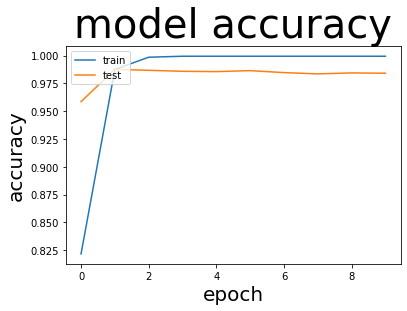

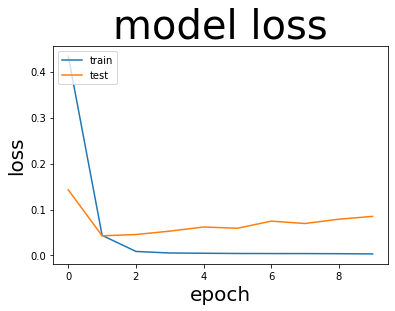

In [25]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy',fontsize=40)
plt.ylabel('accuracy',fontsize=20)
plt.xlabel('epoch',fontsize=20)
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss',fontsize=40)
plt.ylabel('loss',fontsize=20)
plt.xlabel('epoch',fontsize=20)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [26]:
y_pred=np.round(model2.predict(X_test))

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9841316485454011

In [28]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='micro')

0.9841316485454011

In [29]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average='micro')

0.9841316485454011

In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
matrice = confusion_matrix(y_test,y_pred)
matrice

array([[2636,    3],
       [  51,  713]])

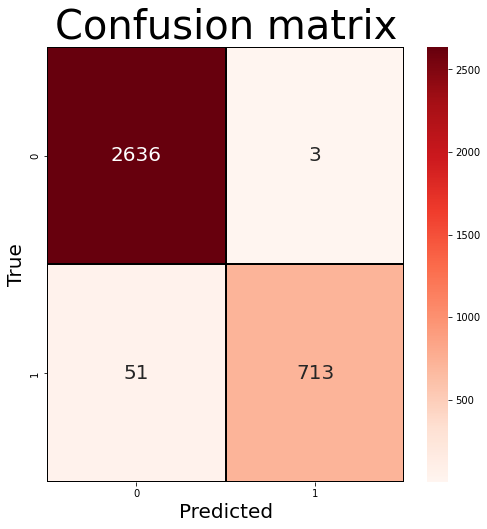

In [36]:
import seaborn as sn
import pandas as pd
df_cm = pd.DataFrame(matrice,columns=[0,1],index=[0,1])
fig, ax = plt.subplots(figsize=(8,8))
sn.heatmap(df_cm, annot=True,linewidths = 1,linecolor="Black",annot_kws={"size": 20},fmt='g',cmap='Reds',)
ax.set_xlabel('Predicted', fontsize=20)
ax.set_ylabel('True', fontsize=20)
plt.title(f"Confusion matrix",fontsize=40)
plt.show()

In [32]:
classify_report = classification_report(y_test, y_pred, )
print(classify_report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2639
           1       1.00      0.93      0.96       764

    accuracy                           0.98      3403
   macro avg       0.99      0.97      0.98      3403
weighted avg       0.98      0.98      0.98      3403

